
# Importing **Libraries** 
---





In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

# Reading Data

---



In [54]:

data = pd.read_csv('heart.csv')
data.head()

Unnamed: 0  age     sex      cp  ...  slope  ca          thal  target
0           0   63    male  severe  ...      0   0        normal     yes
1           1   37    male  medium  ...      0   0  fixed_defect     yes
2           2   41  female    weak  ...      2   0  fixed_defect     yes
3           3   56    male    weak  ...      2   0  fixed_defect     yes
4           4   57  female    none  ...      2   0  fixed_defect     yes

[5 rows x 15 columns]

# Preparing Data

---


In [55]:
lb_make = LabelEncoder()
########### age preparing ############
data['age'] = pd.cut(data.age,bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 99],labels=['0', '1', '2', '3', '4', '5', '6', '7', '8'])

########### sex preparing ############
data['sex'] =lb_make.fit_transform(data['sex'])

# data['sex'].at[data['sex'] == 'male'] = 0
# data['sex'].at[data['sex'] == 'female'] = 1

###########  cp preparing ############
data['cp'] =lb_make.fit_transform(data['cp'])

# data['cp'].at[data['cp'] == 'none'] = np.nan
# data['cp'].at[data['cp'] == 'weak'] = 1
# data['cp'].at[data['cp'] == 'medium'] = 2
# data['cp'].at[data['cp'] == 'severe'] = 3

##########    trestbs   ###############
data['trestbps'] = pd.cut(data.trestbps,bins=[80, 110, 140, 170, 200],labels=['0', '1', '2', '3'])

##########      chol    ###############
data['chol'] = pd.cut(data.chol,bins=[100, 150, 200, 250, 300, 350, 400, 500, 600],labels=['0', '1', '2', '3', '4', '5', '6', '7'])

##########     fbs     ################
data['fbs'] =lb_make.fit_transform(data['fbs'])

# data['fbs'].at[data['fbs'] == False] = 0
# data['fbs'].at[data['fbs'] == True] = 1

##########    thalach    ###############
data['thalach'] = pd.cut(data.thalach,bins=[70, 100, 130, 160, 190, 220],labels=['0', '1', '2', '3', '4'])

##########     exang     ###############
data['exang'] =lb_make.fit_transform(data['exang'])

# data['exang'].at[data['exang'] == 'no'] = 0
# data['exang'].at[data['exang'] == 'yes'] = 1

##########    oldpeak    ###############
data['oldpeak'] = pd.cut(data.oldpeak,bins=[-0.1, 1, 2, 3, 4, 5, 6, 7],labels=['0', '1', '2', '3', '4', '5', '6'])

##########     thal      ###############
data['thal'] =lb_make.fit_transform(data['thal'])

# data['thal'].at[data['thal'] == 'normal'] = 0
# data['thal'].at[data['thal'] == 'fixed_defect'] = 1
# data['thal'].at[data['thal'] == 'eversable_defect'] = 2

##########     target    ###############
data['target'] =lb_make.fit_transform(data['target'])

# data['target'].at[data['target'] == 'no'] = 0
# data['target'].at[data['target'] == 'yes'] = 1

data.head()


Unnamed: 0 age  sex  cp trestbps  ... oldpeak  slope  ca thal  target
0           0   6    1   2        2  ...       2      0   0    2       1
1           1   3    1   0        1  ...       3      0   0    1       1
2           2   4    0   3        1  ...       1      2   0    1       1
3           3   5    1   3        1  ...       0      2   0    1       1
4           4   5    0   1        1  ...       0      2   0    1       1

[5 rows x 15 columns]

# Train and Test Split

---



In [56]:
y = data.target
x = pd.DataFrame(data.drop(['target', 'Unnamed: 0'], axis=1))
xFeatures = x.columns.values  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

x_train

age  sex  cp trestbps chol  fbs  ...  thalach exang  oldpeak slope  ca  thal
78    5    1   3        1    2    1  ...        3     0        0     2   0     1
10    5    1   1        1    2    0  ...        2     0        1     2   0     1
60    7    0   0        0    3    1  ...        1     0        0     2   1     1
273   5    1   1        0    2    0  ...        2     0        0     2   1     0
115   3    0   0        1    2    0  ...        3     0        0     2   0     1
..   ..  ...  ..      ...  ...  ...  ...      ...   ...      ...   ...  ..   ...
106   6    1   2        2    2    1  ...        2     0        0     1   1     1
251   4    1   1        1    2    1  ...        2     1        0     1   4     0
223   5    0   1        3    3    1  ...        2     1        3     0   2     0
174   5    1   1        1    2    0  ...        2     1        2     1   2     0
74    4    0   0        1    2    0  ...        3     0        0     1   0     1

[242 rows x 13 columns]

# Training and Classification

---

# Criterion gini - MaxDepth 1 - MinSplit 2

In [67]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 1, min_samples_split = 2)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        27
           1       0.74      0.74      0.74        34

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



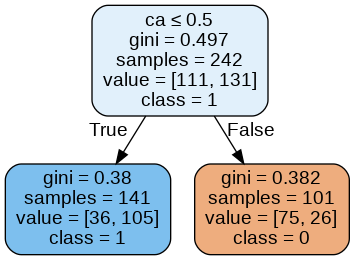

In [68]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_1_split_2.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 2 - MinSplit 2

In [69]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_split = 2)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        27
           1       0.78      0.82      0.80        34

    accuracy                           0.77        61
   macro avg       0.77      0.76      0.77        61
weighted avg       0.77      0.77      0.77        61



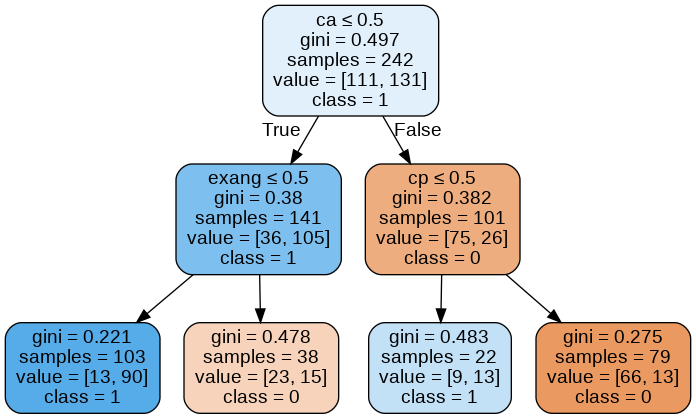

In [70]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_2_split_2.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 3 - MinSplit 2

In [71]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split = 2)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.76      0.91      0.83        34

    accuracy                           0.79        61
   macro avg       0.80      0.77      0.78        61
weighted avg       0.80      0.79      0.78        61



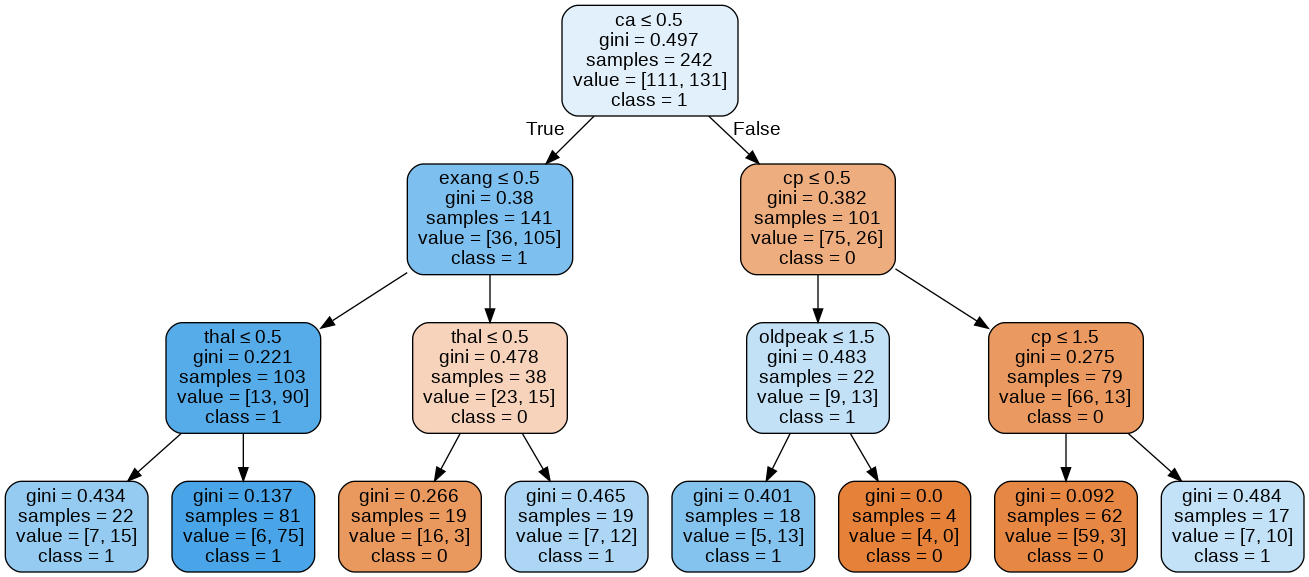

In [72]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_3_split_2.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 4 - MinSplit 2

In [73]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split = 2)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



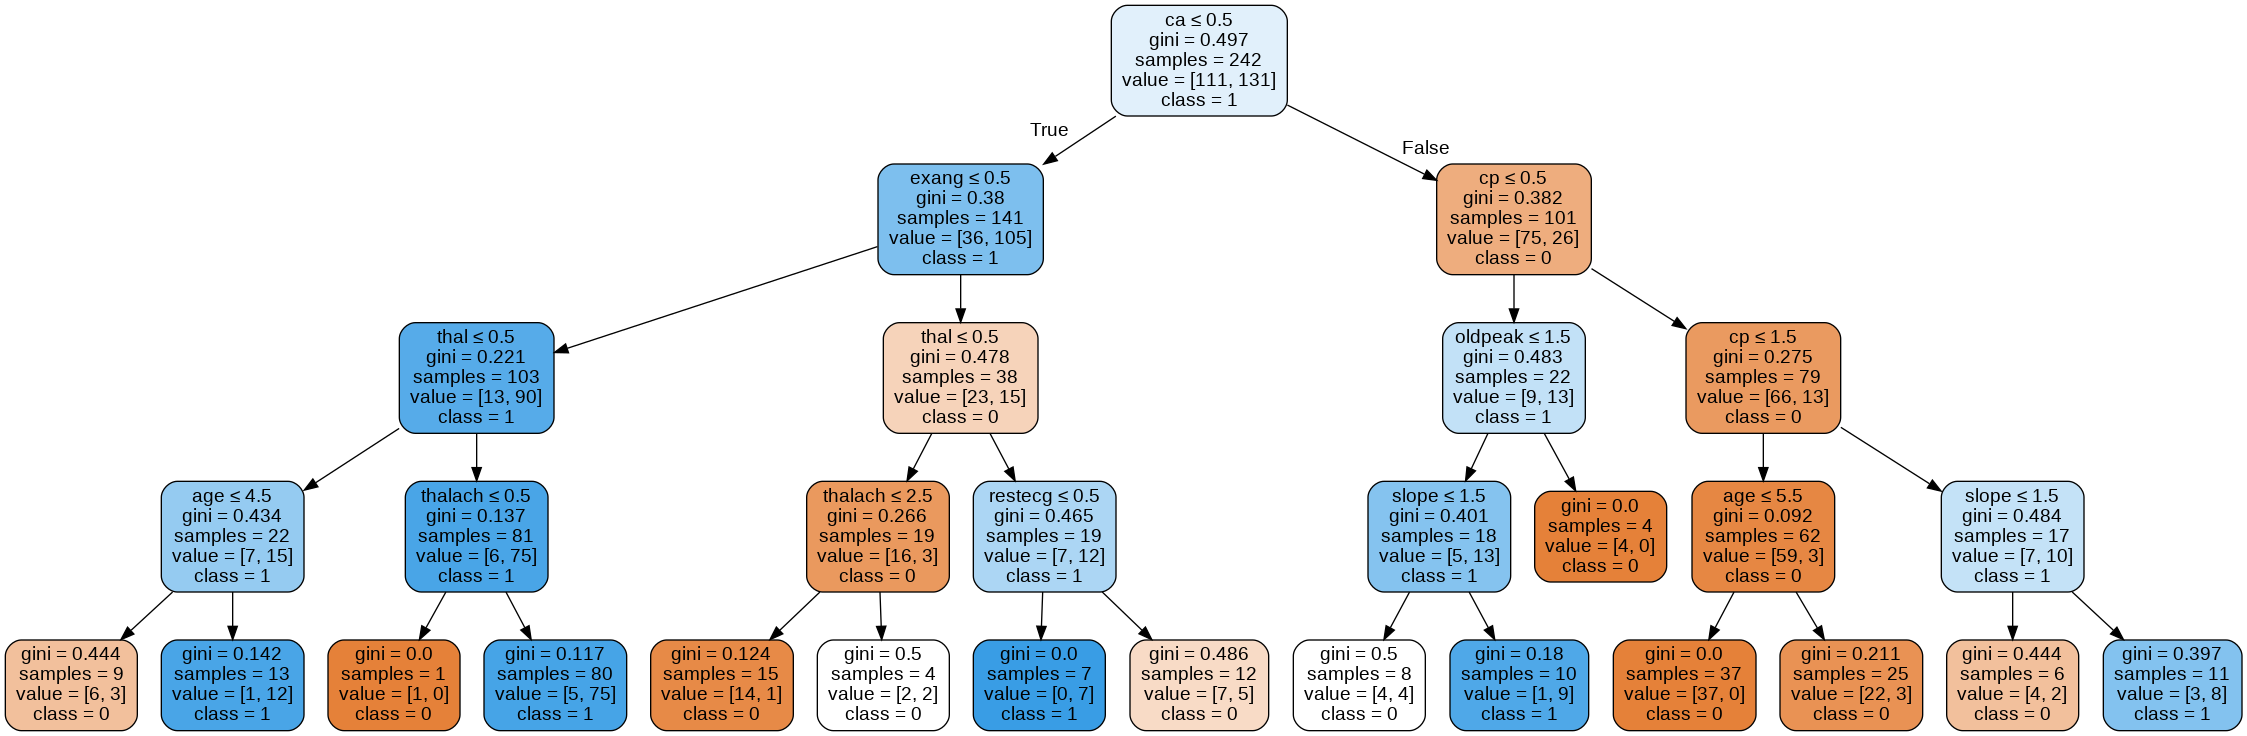

In [74]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_4_split_2.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 5 - MinSplit 2

In [75]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 2)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.72      0.62      0.67        34

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.66      0.66        61



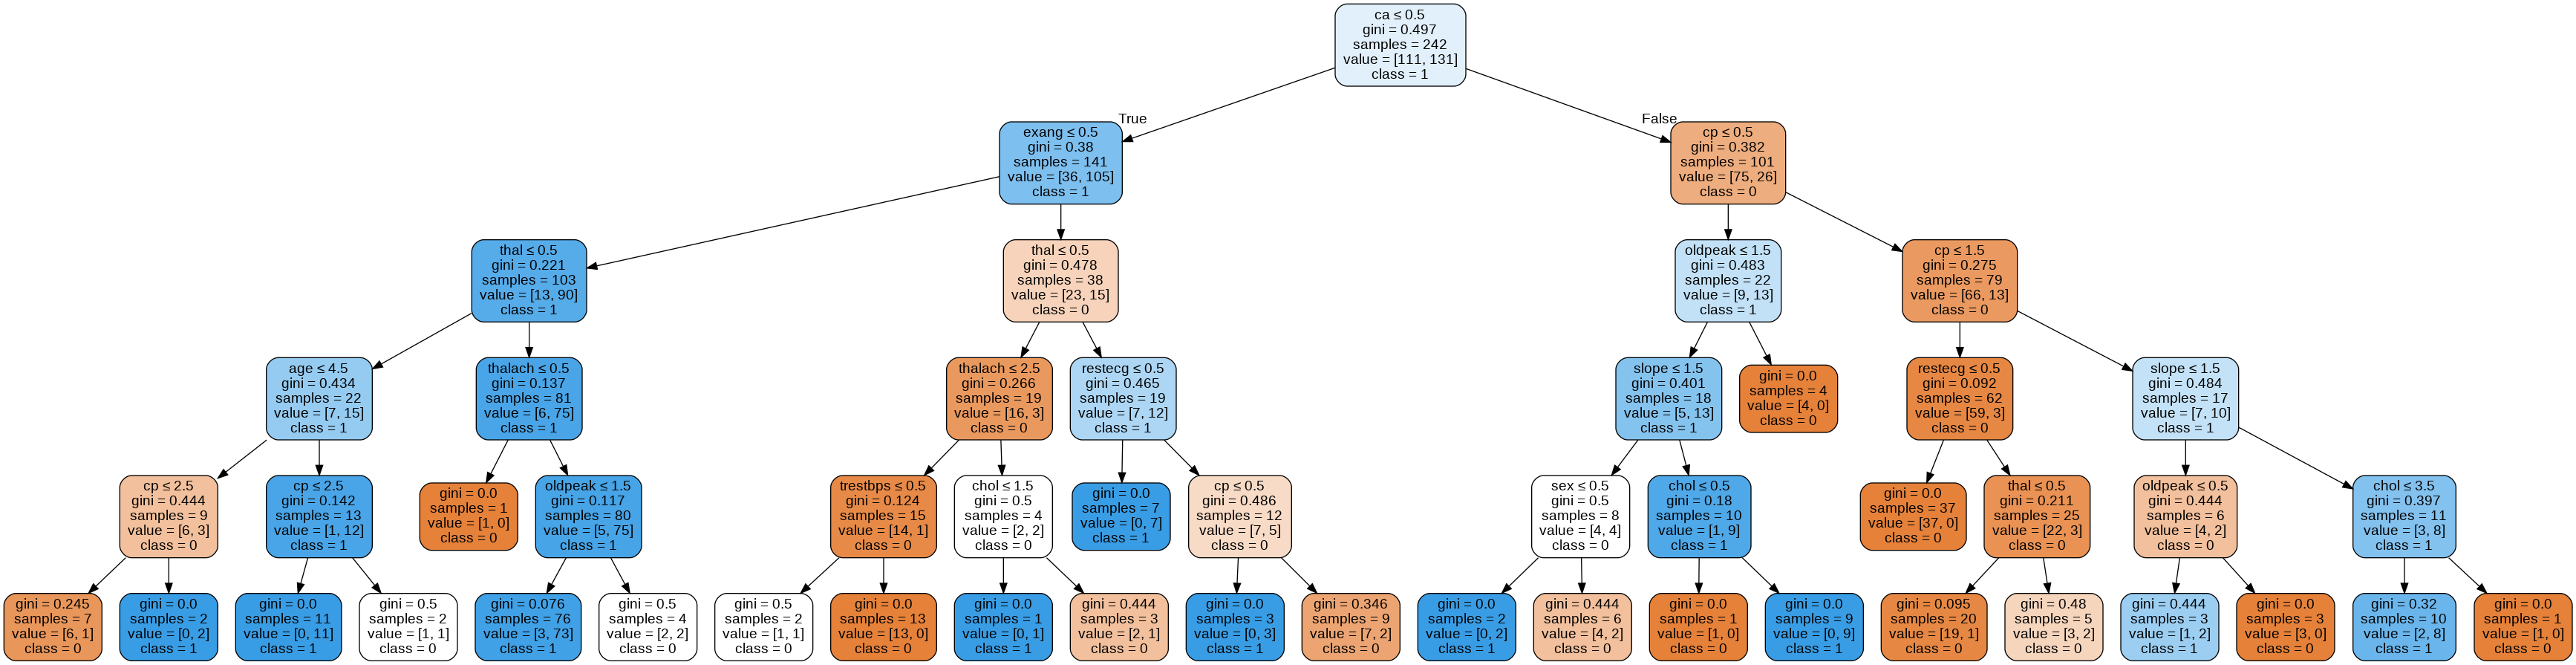

In [76]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_5_split_2.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 6 - MinSplit 2

In [77]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 2)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        27
           1       0.73      0.71      0.72        34

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



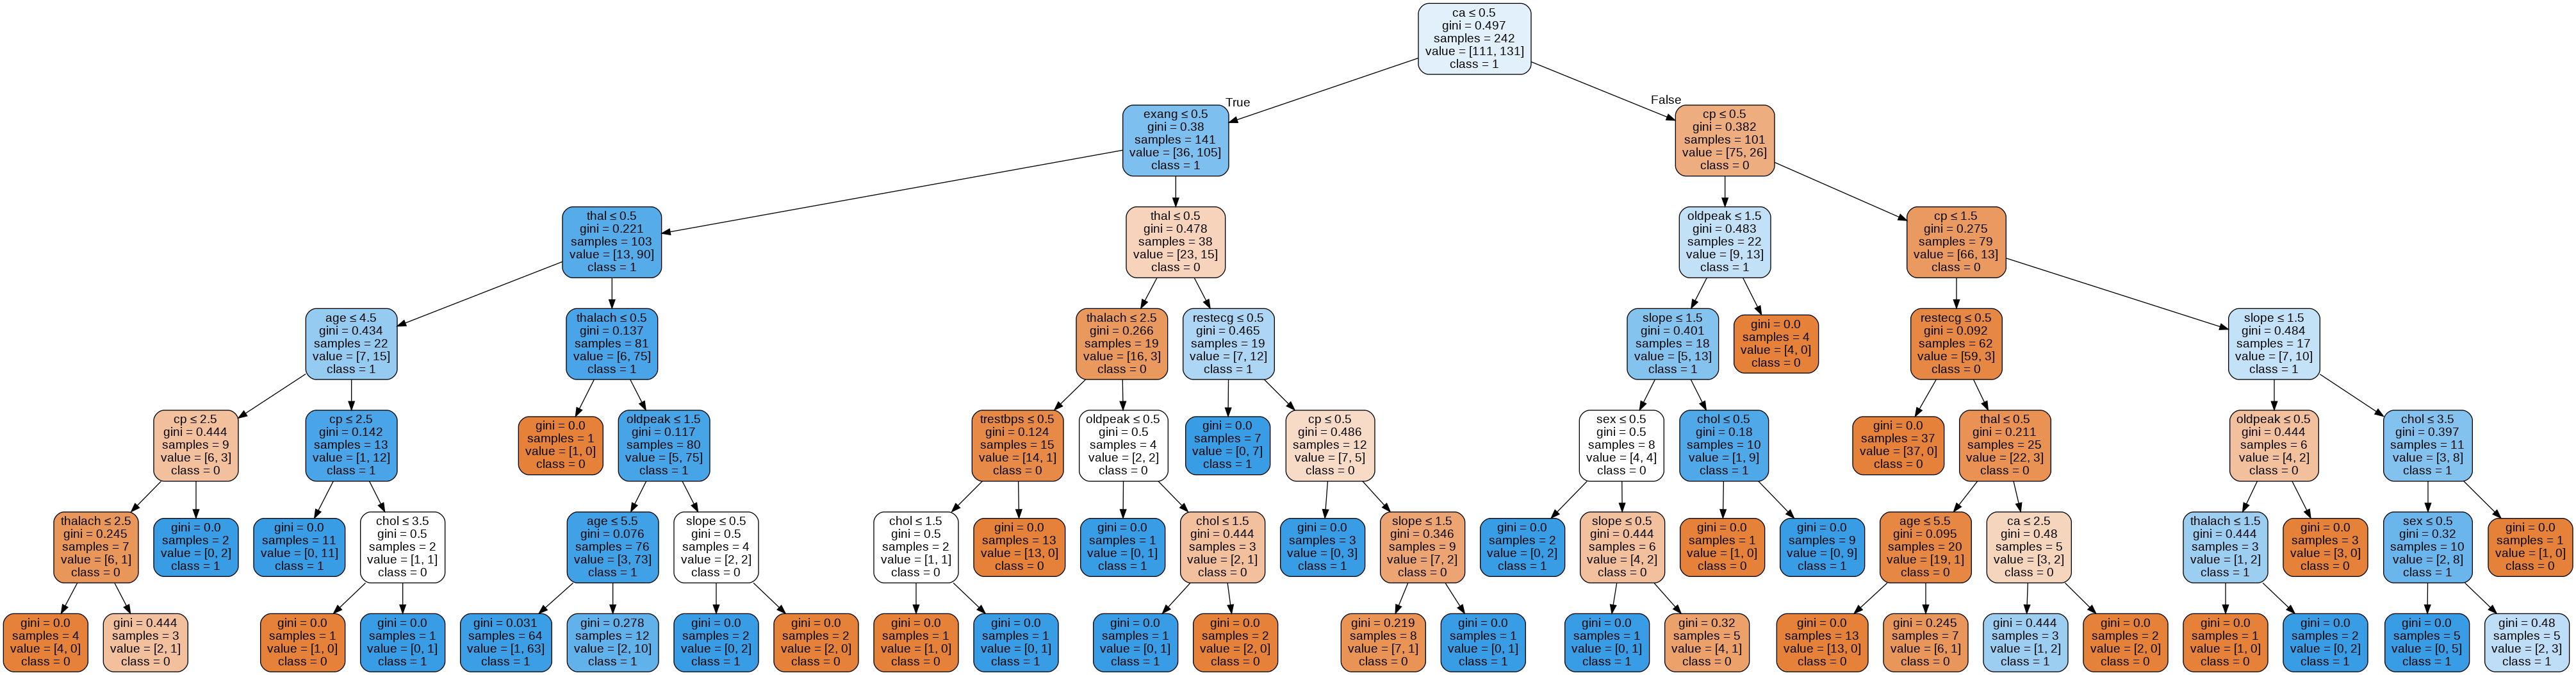

In [78]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_6_split_2.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 3 - MinSplit 4

In [79]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.85      0.63      0.72        27
           1       0.76      0.91      0.83        34

    accuracy                           0.79        61
   macro avg       0.80      0.77      0.78        61
weighted avg       0.80      0.79      0.78        61



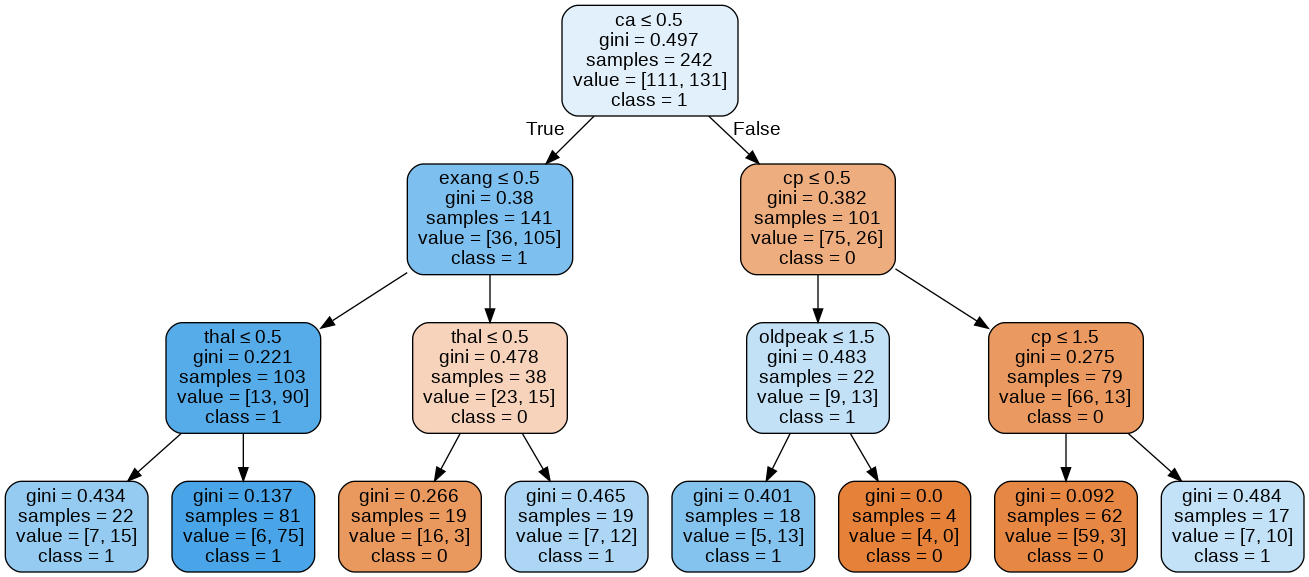

In [80]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_3_split_4.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 4 - MinSplit 4

In [81]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



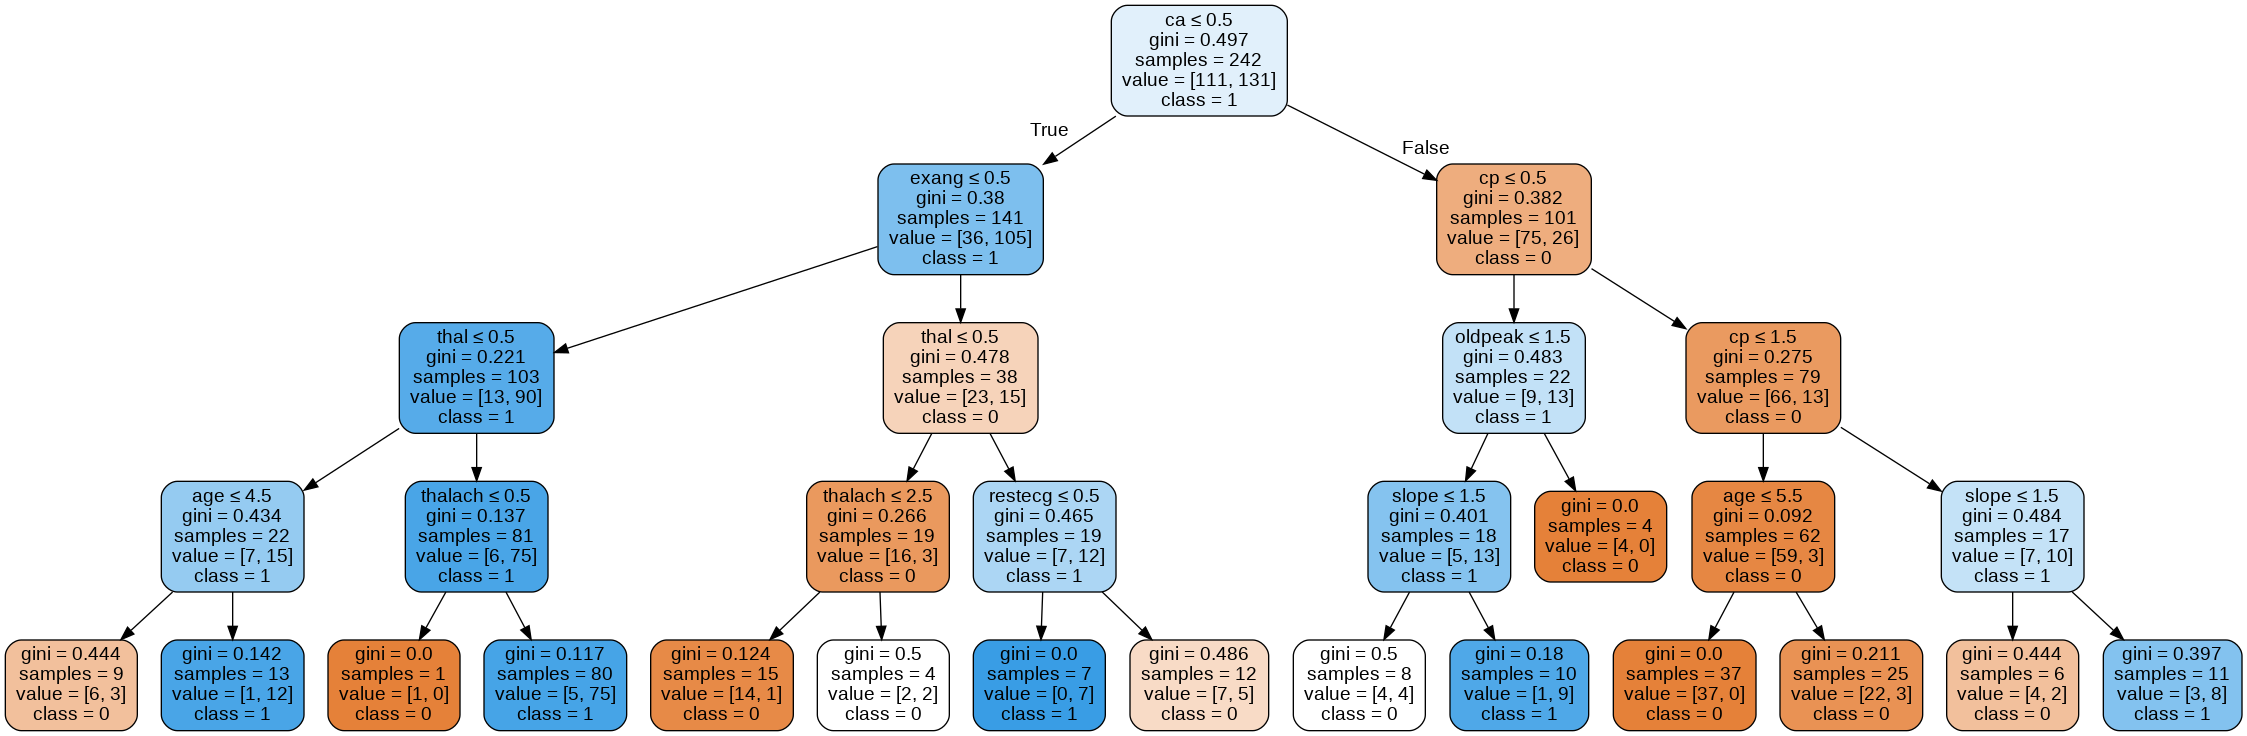

In [82]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_4_split_4.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 5 - MinSplit 4

In [83]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.72      0.62      0.67        34

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.66      0.66        61



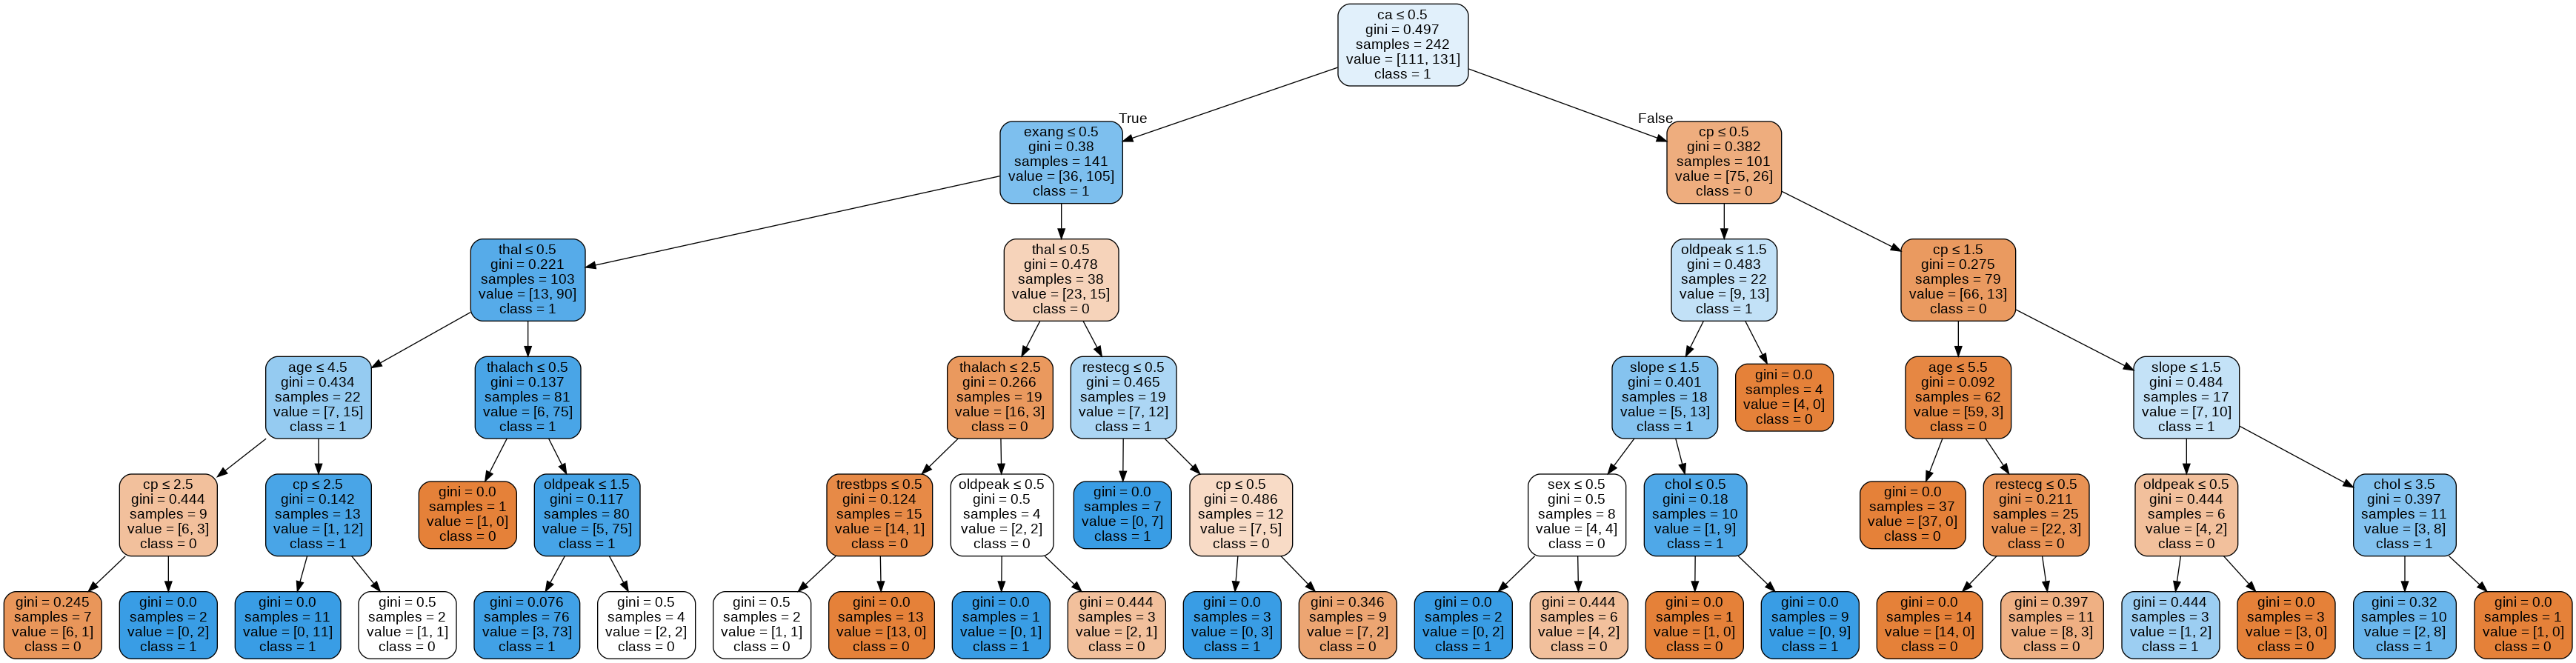

In [84]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_5_split_4.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 6 - MinSplit 4

In [85]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        27
           1       0.71      0.65      0.68        34

    accuracy                           0.66        61
   macro avg       0.65      0.66      0.65        61
weighted avg       0.66      0.66      0.66        61



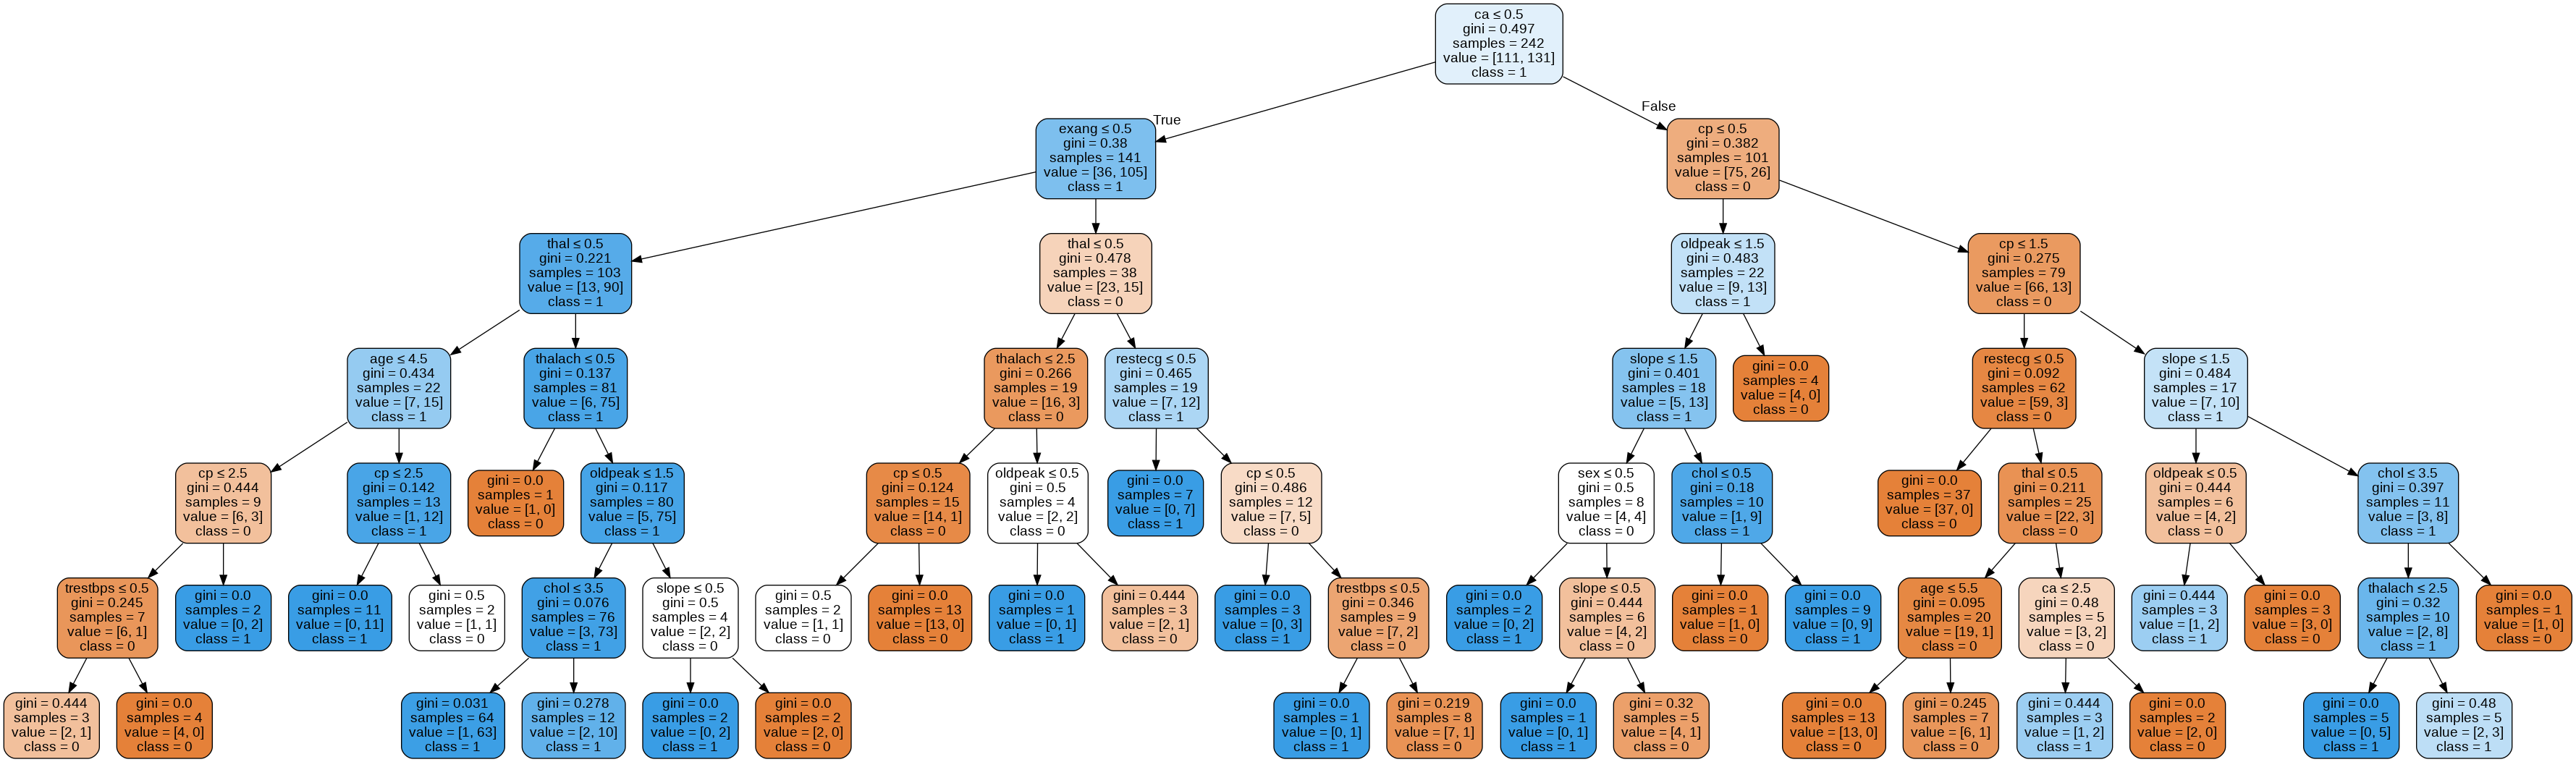

In [86]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_6_split_4.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 4 - MinSplit 5

In [87]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split = 5)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



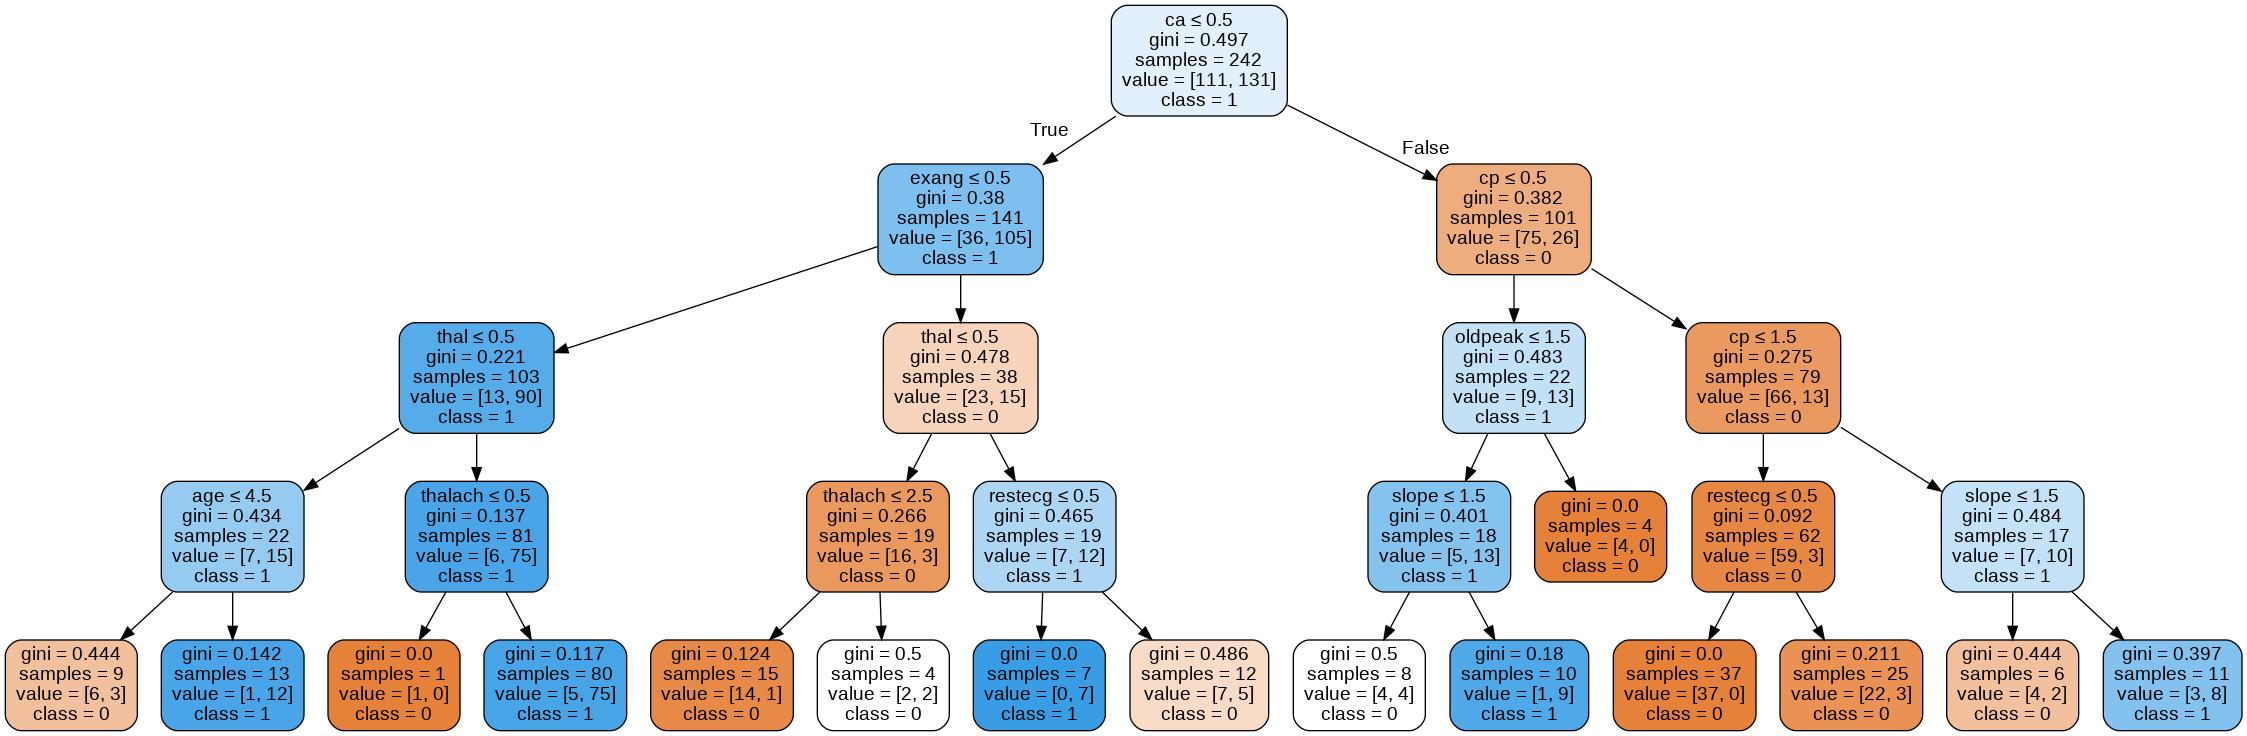

In [88]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_4_split_5.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 5 - MinSplit 5

In [89]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split = 5)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.72      0.62      0.67        34

    accuracy                           0.66        61
   macro avg       0.66      0.66      0.66        61
weighted avg       0.67      0.66      0.66        61



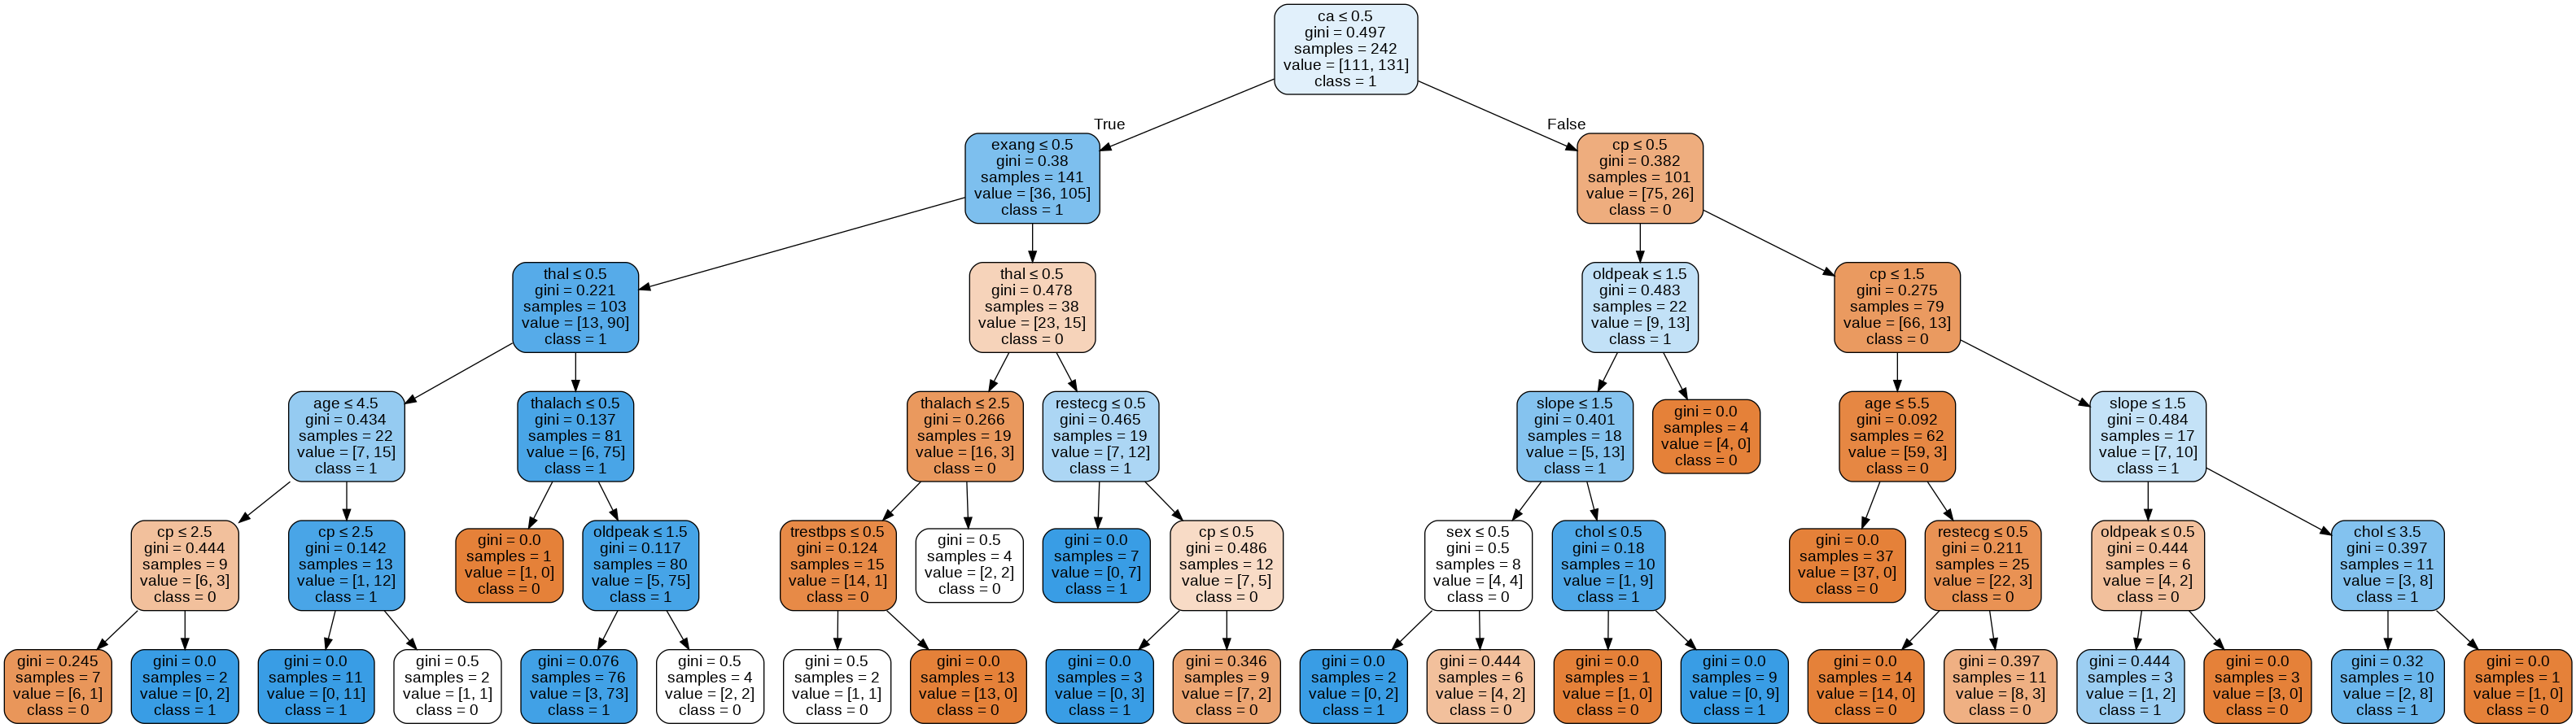

In [90]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_5_split_5.png')
Image(graph.create_png())

# Criterion gini - MaxDepth 4 - MinSplit 6

In [91]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split = 6)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.84      0.79      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



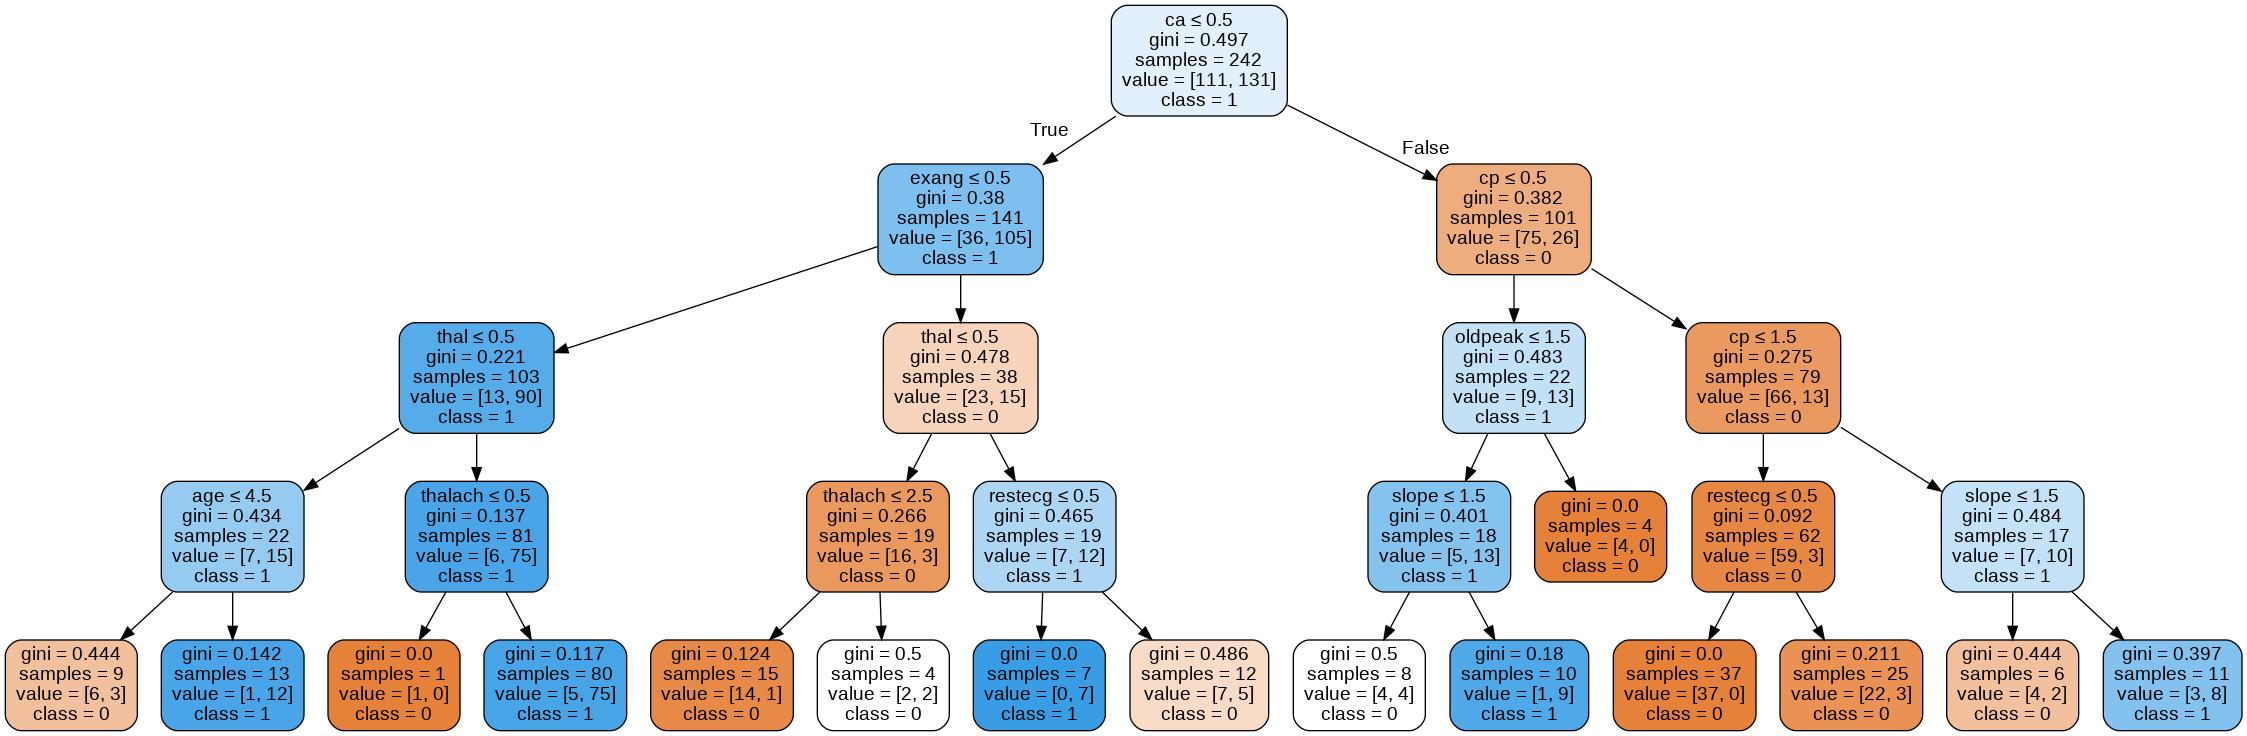

In [92]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gini_Max_depth_4_split_6.png')
Image(graph.create_png())

# Criterion entropy - MaxDepth 3 - MinSplit 4

In [98]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



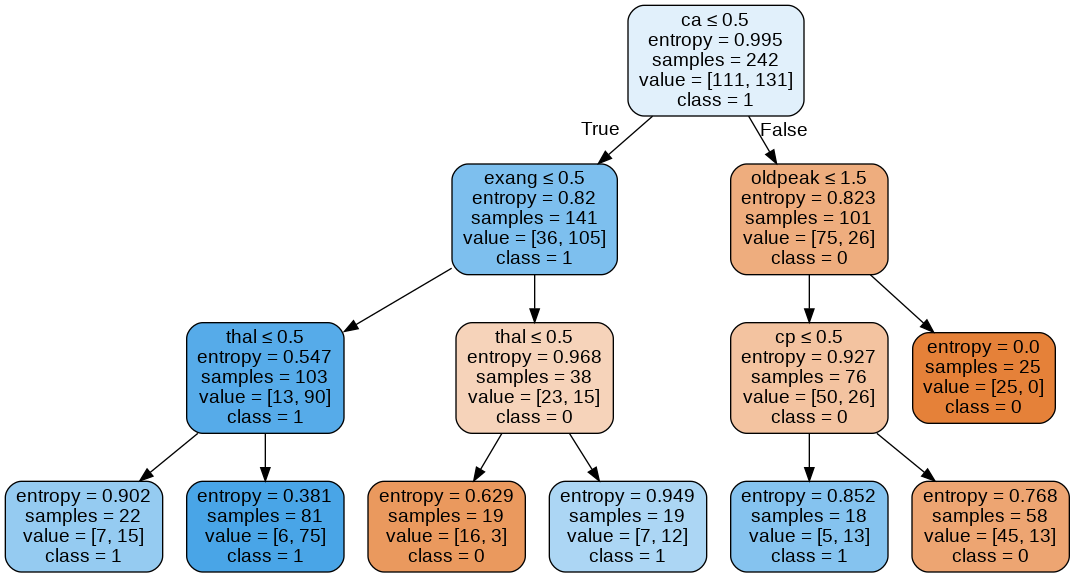

In [100]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy_Max_depth_3_split_4.png')
Image(graph.create_png())

# Criterion entropy - MaxDepth 4 - MinSplit 4

In [93]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.68      0.70      0.69        27
           1       0.76      0.74      0.75        34

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



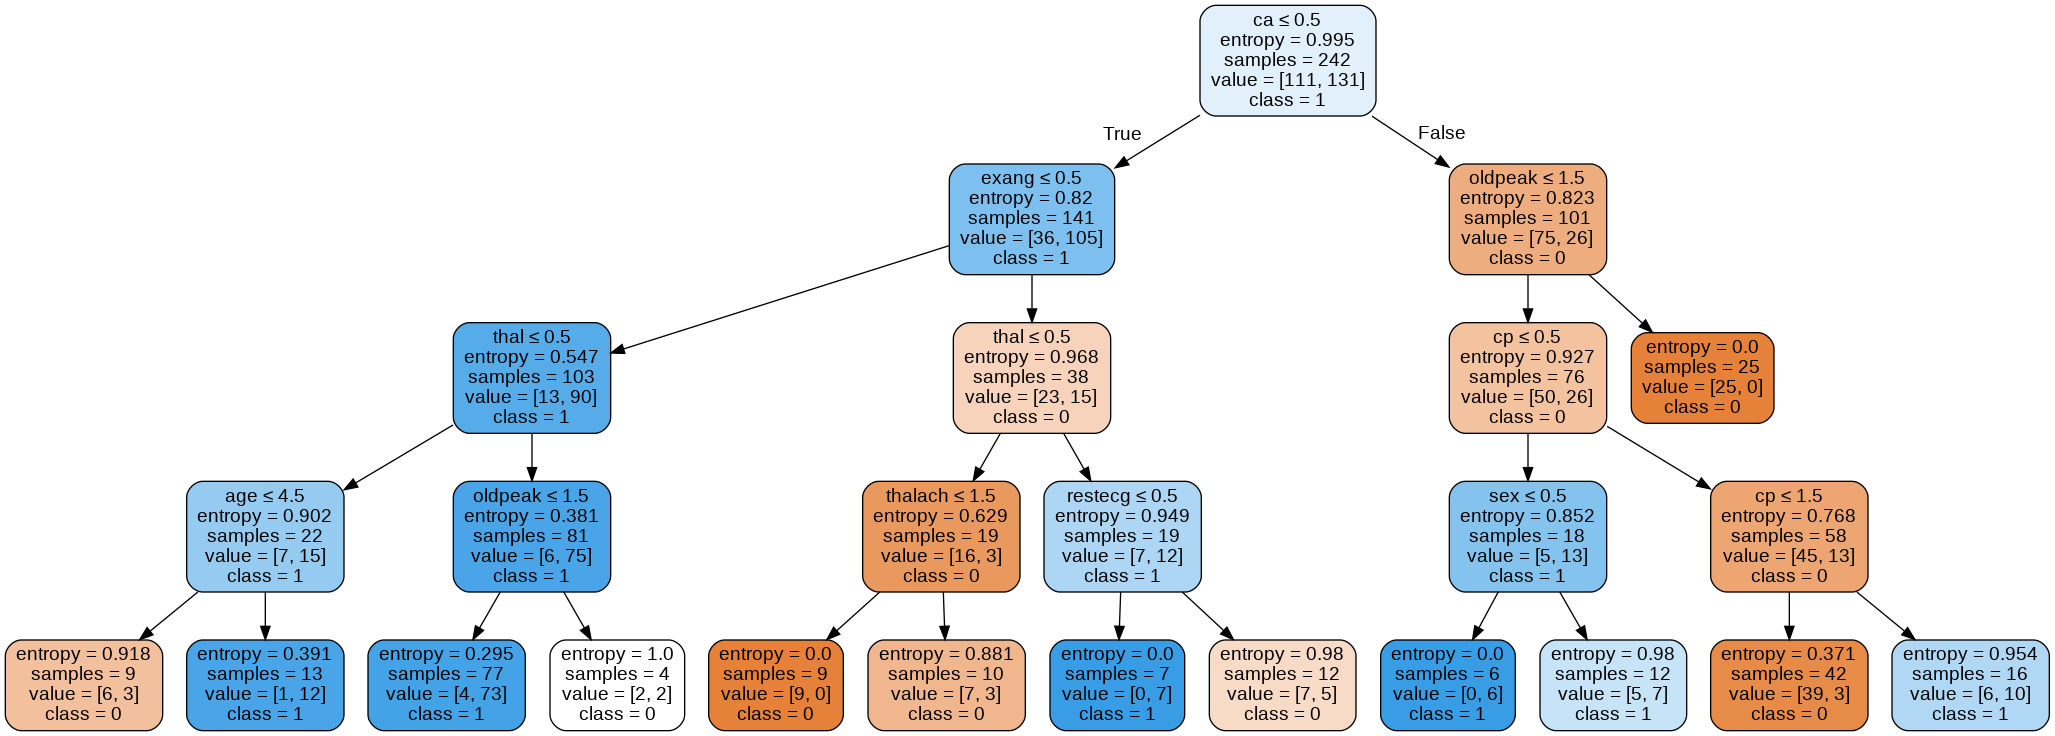

In [94]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy_Max_depth_4_split_4.png')
Image(graph.create_png())

# Criterion entropy - MaxDepth 5 - MinSplit 4

In [95]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_split = 4)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65        27
           1       0.73      0.71      0.72        34

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



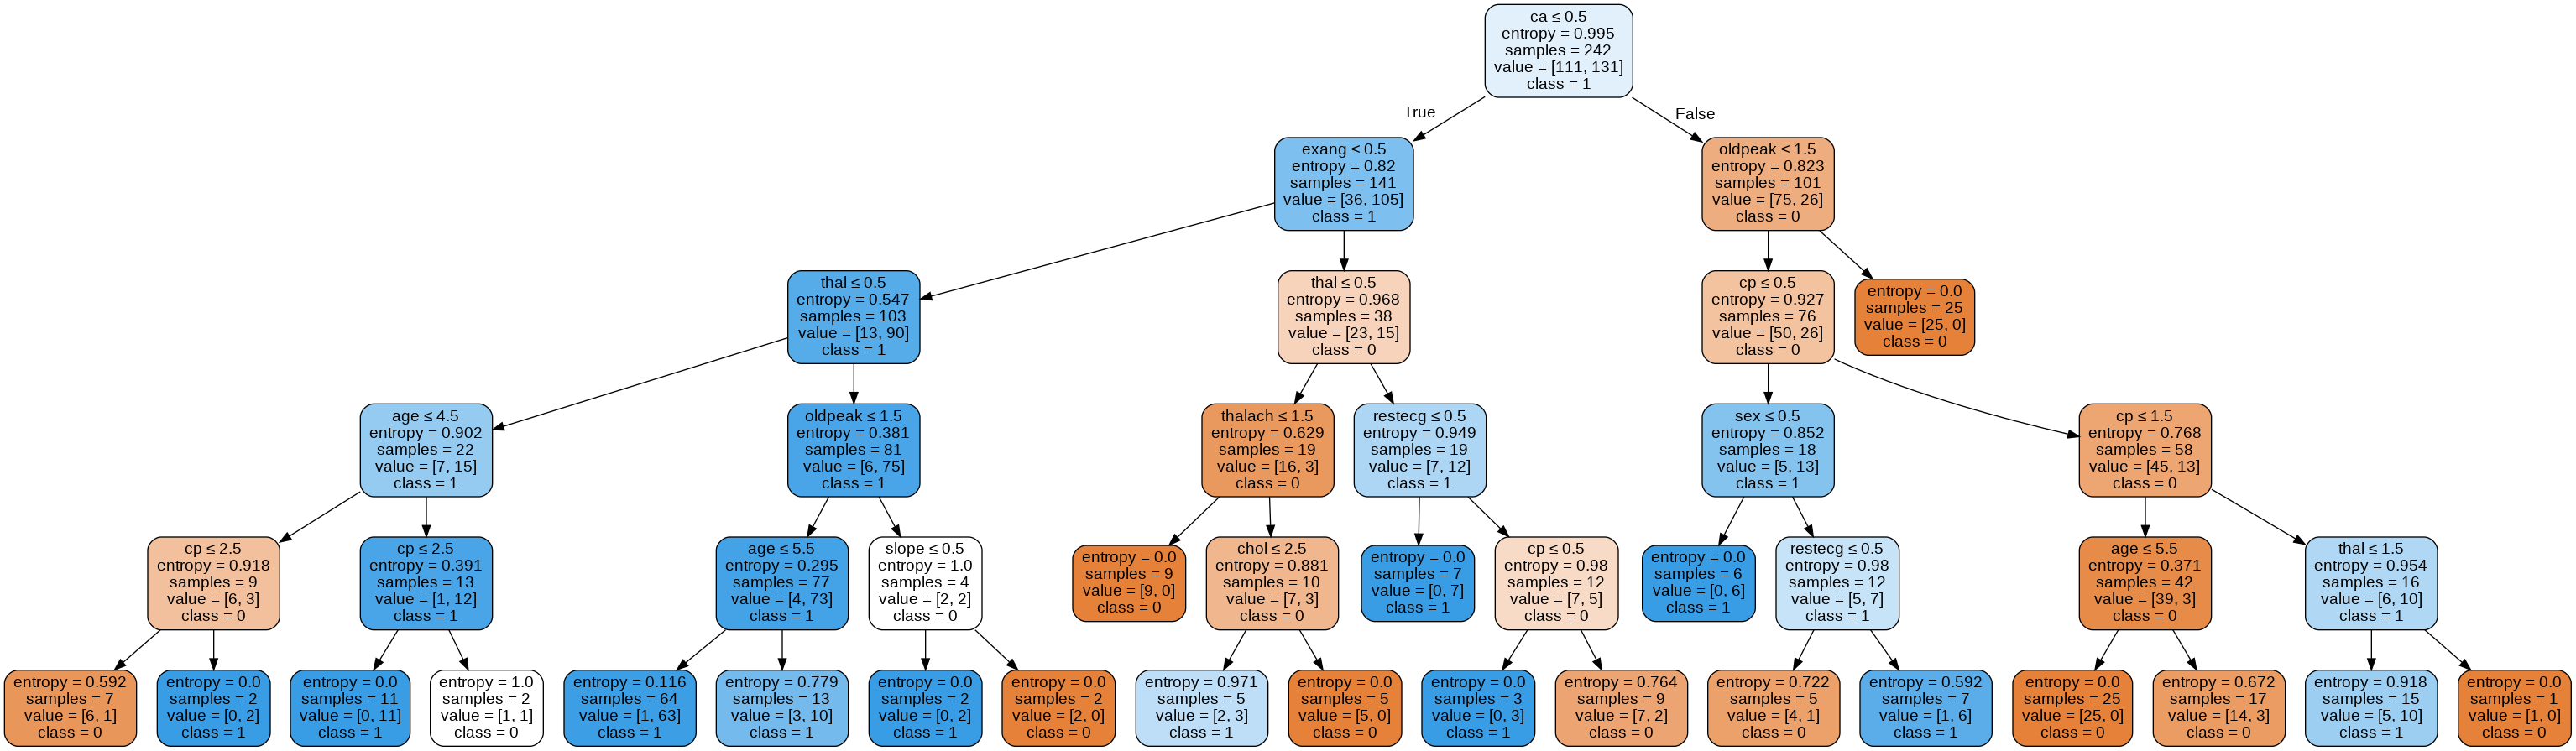

In [96]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy_Max_depth_5_split_4.png')
Image(graph.create_png())

# Criterion entropy - MaxDepth 3 - MinSplit 5

In [101]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split = 5)
clf = clf.fit(x_train, y_train)
yPredict = clf.predict(x_test)
print(classification_report(y_test,yPredict))

              precision    recall  f1-score   support

           0       0.83      0.70      0.76        27
           1       0.79      0.88      0.83        34

    accuracy                           0.80        61
   macro avg       0.81      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



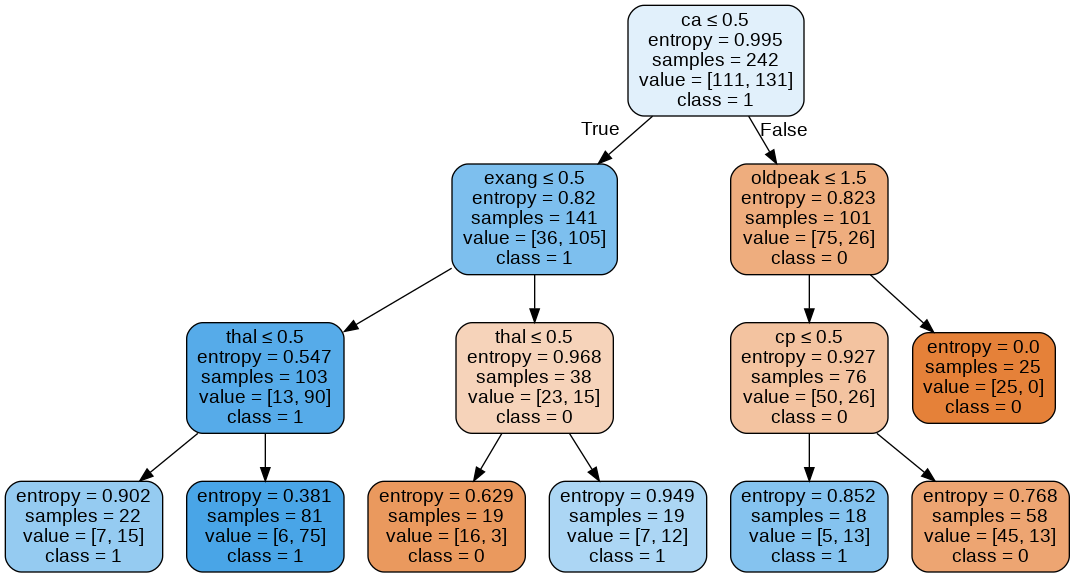

In [102]:
dot_data = StringIO()
export_graphviz(clf,
                out_file = dot_data,  
                filled = True,
                rounded = True,
                special_characters = True,
                feature_names = xFeatures,
                class_names = ['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('entropy_Max_depth_3_split_5.png')
Image(graph.create_png())